#Лабораторная работа 2: градиентный спуск#

1. Реализовать метод градиентного спуска

2. Оценить как меняется скорость сходимости, если для поиска величины шага использовать:
 - постоянную велечину шага
 - метод дробления шага
 - метод золотого сечения
 - метод Фибоначчи
 - метод линейного поиска (***)

3. Проанализировать траекторию реализованных методов для нескольких квадратичных функций (двумерных):
 - придумать 2-3 функции, на которых метод будет отличаться
 - рассмотреть разные начальные приближения
 - нарисавать гафики с линиями уровня и траектории методов

4. Сделать вывод о зависимости сходимости метода от выбранной точки начального приближения

5. Реализовать один из методов сопряженных направлений:
 - метод сопряженных градиентов
 - метод Флетчера-Ривса
 - метод Полака-рибьера

6. Сравнить траектории градиентного спуска и метода сопряженных направлений при фиксированном начальном приближении

7. Отчет + вывод + защита

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def dist(a, b) -> float:
    return ((b[0]-a[0])**2 + (b[1]-a[1])**2)**0.5

def scalar(a, b) -> float:
    return (b[0] * a[0] + b[1] * a[1])

def grad_stop(x_1, x_2, f_1, f_2, eps, p):
    if round(dist(x_2, x_1) + abs(f_2 - f_1), p + 1) <= eps:
        return True
    return False

In [ ]:
def f(x) -> float:
    return 2 * x[0] ** 2 + x[0] * x[1] + x[1] ** 2

def dfdx(x) -> float:
    return 4 * x[0] + x[1] 

def dfdy(x) -> float:
    return x[0] + 2 * x[1] 

def grad_f(x):
    return (dfdx(x), dfdy(x))

def np_f(x, y):
    return x ** 2 + x * y + y ** 2

In [ ]:
def g(x) -> float:
    return (x[0] + 1) ** 2 / 4 + (2 * x[1] - 1) ** 2 / 3 + 1

def dgdx(x) -> float:
    return (x[0] + 1) / 2

def dgdy(x) -> float:
    return 4 * (2 * x[1] - 1) / 3

def np_g(x, y):
    return (x + 1) ** 2 / 4 + (2 * y - 1) ** 2 / 3 + 1

def grad_g(x):
    return (dgdx(x), dgdy(x))

In [ ]:
def h(x) -> float:
    return x[0] ** 2 + x[1] ** 3 * x[0]

def dhdx(x) -> float:
    return 2 * x[0] + x[1] ** 3
def dhdy(x) -> float:
    return 3 * x[1] ** 2 * x[0]

def np_h(x, y):
    return x ** 2 + y ** 3 * x

def grad_h(x):
    return (dhdx(x), dhdy(x))

In [ ]:
def r(x) -> float:
    print(((1 - x[0]) ** 2) + 100 * ((x[1] - x[0] ** 2) ** 2))
    return (1 - x[0]) ** 2 + 100 * ((x[1] - x[0] ** 2) ** 2)

def drdx(x) -> float:
    return -2 + 2 * x[0] - 400 * x[0] * x[1] + 400 * x[0] ** 3

def drdy(x) -> float:
    return 200 * (x[1] - x[0] ** 2)

def grad_r(x):
    return (drdx(x), drdy(x))

def np_r(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

#Постоянный шаг

In [ ]:
def grad_search_const(f, dfdx, dfdy, start, rate, p):
    X = [start] #последовательность точек
    k = 0 #номер шага/число итераций
    learning_rate = rate
    eps = 10 ** (-p)
    while True:

        x_k = X[k-1][0] - learning_rate * (dfdx(X[k-1]))
        y_k = X[k-1][1] - learning_rate * (dfdy(X[k-1]))
        X.append((x_k, y_k))
        if grad_stop(X[k], X[k-1], f(X[k]), f(X[k-1]), eps, p):
            break
        k += 1
    x = [X[i][0] for i in range(k+1)]
    y = [X[i][1] for i in range(k+1)]
    z = [f(X[i]) for i in range(k+1)]

    print(k)
    print(x[-1],y[-1],z[-1])
    return x, y, z

2
-5090 -14990 17144415425818100
2
410 2396 5639548173860
2
13675 -14714 -43563181368248575
2
-275 1204 -479967781975


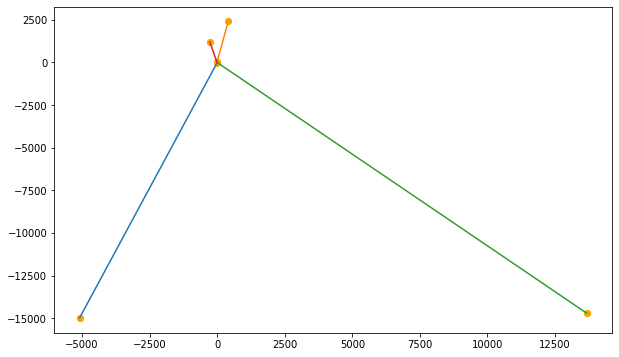

In [ ]:
X = 15
N = 1000
u = np.linspace(-X, X, N)
np_x, np_y = np.meshgrid(u, u)
np_z = np_h(np_x, np_y)
plt.figure(figsize=(10,6))
plt.contour(np_x, np_y, np_z, 40)

for start in [(10, 10), (-10, -4), (5, -14), (-5, 4)]:
    x, y, z = grad_search_const(h, dhdx, dhdy, start, 5, 3)

    plt.plot(x, y)
    plt.scatter(x, y, color='orange')

plt.show()

In [ ]:
X = 15
N = 1000
u = np.linspace(-X, X, N)
np_x, np_y = np.meshgrid(u, u)
np_z = np_g(np_x, np_y)
plt.figure(figsize=(10,6))
plt.contour(np_x, np_y, np_z, 40)

for start in [(10, 10), (-10, -4), (5, -14), (-5, 4)]:
    x, y, z = grad_search_const(g, dgdx, dgdy, start, 0.05, 3)

    plt.plot(x, y)
    plt.scatter(x, y, color='orange')

plt.show()

In [ ]:
X = 15
N = 1000
u = np.linspace(-X, X, N)
np_x, np_y = np.meshgrid(u, u)
np_z = np_h(np_x, np_y)
plt.figure(figsize=(10,6))
plt.contour(np_x, np_y, np_z, 40)

for start in [(10, 10), (-10, -4), (5, -14), (-5, 4)]:
    x, y, z = grad_search_const(h, dhdx, dhdy, start, 0.05, 3)

    plt.plot(x, y)
    plt.scatter(x, y, color='orange')

plt.show()

In [ ]:
X = 3
N = 1000
u = np.linspace(-X, X, N)
np_x, np_y = np.meshgrid(u, u)
np_z = np_r(np_x, np_y)
plt.figure(figsize=(10,6))
plt.contour(np_x, np_y, np_z, 40)

for start in [(1, 2)]:
    x, y, z = grad_search_const(r, drdx, drdy, start, 0.002, 3)

    plt.plot(x, y)
    plt.scatter(x, y, color='orange')

plt.show()

#Дробление

In [ ]:
def rate_k_1(x):
    return 0.5 - np.arctan(x - np.pi) / np.pi

def rate_k_2(x):
    return 1 / (x + 1)

def grad_search_split(f, dfdx, dfdy, start, p, rate_k):
    X = [start] #последовательность точек
    k = 1 #номер шага/число итераций
    eps = 10 ** (-p)

    while True:
        learning_rate = rate_k(k)
        x_k = X[k-1][0] - learning_rate * (dfdx(X[k-1]))
        y_k = X[k-1][1] - learning_rate * (dfdy(X[k-1]))
        X.append((x_k, y_k))
        if grad_stop(X[k], X[k-1], f(X[k]), f(X[k-1]), eps, p):
            break
        k += 1
    x = [X[i][0] for i in range(k+1)]
    y = [X[i][1] for i in range(k+1)]
    z = [f(X[i]) for i in range(k+1)]

    print(k)
    print(x[-1],y[-1],z[-1])
    return x, y, z

In [ ]:
X = 15
N = 1000
u = np.linspace(-X, X, N)
np_x, np_y = np.meshgrid(u, u)
np_z = np_h(np_x, np_y)
plt.figure(figsize=(10,6))
plt.contour(np_x, np_y, np_z, 40)

for start in [(1,1)]:
    x, y, z = grad_search_split(h, dfdx, dfdy, start, 4, rate_k_2)

    plt.plot(x, y)
    plt.scatter(x, y, color='orange')

plt.show()

In [ ]:
X = 15
N = 1000
u = np.linspace(-X, X, N)
np_x, np_y = np.meshgrid(u, u)
np_z = np_g(np_x, np_y)
plt.figure(figsize=(10,6))
plt.contour(np_x, np_y, np_z, 40)

for start in [(10, 10), (-10, -4), (5, -14), (-5, 4)]:
    x, y, z = grad_search_split(g, dgdx, dgdy, start, 4, rate_k_2)

    plt.plot(x, y)
    plt.scatter(x, y, color='orange')

plt.show()

In [ ]:
X = 15
N = 1000
u = np.linspace(-X, X, N)
np_x, np_y = np.meshgrid(u, u)
np_z = np_h(np_x, np_y)
plt.figure(figsize=(10,6))
plt.contour(np_x, np_y, np_z, 40)

for start in [(10, 10), (-10, -4), (5, -14), (-5, 4)]:
    x, y, z = grad_search_split(h, dhdx, dhdy, start, 4, rate_k_2)

    plt.plot(x, y)
    plt.scatter(x, y, color='orange')

plt.show()

#Золотое сечение

In [ ]:
def find_best_rate_golden(f, dfdx, dfdy, point, rate):
    new_point = (point[0] - rate * (dfdx(point)),
                 point[1] - rate * (dfdy(point)))
    while f(new_point) > f(point):
        rate *= (3 - 5**0.5) / 2
        new_point = (point[0] - rate * (dfdx(point)),
                     point[1] - rate * (dfdy(point)))
    
    #print(rate)
    return rate

def goldenRatioMethod(f, dfdx, dfdy, point, _rate):
    a, b = 0, _rate
    fi = (3 - 5 ** 0.5) / 2
    k = 0
    p = 3
    e = 10 ** (-p)
    A = [a]
    B = [b]
    Y = [A[k] + fi * (B[k] - A[k])]
    Z = [A[k] + B[k] - Y[k]]

    while True:
        point_y = (point[0] - Y[k] * (dfdx(point)),
                   point[1] - Y[k] * (dfdy(point)))
        f_y_k = f(point_y)
        point_z = (point[0] - Z[k] * (dfdx(point)),
                   point[1] - Z[k] * (dfdy(point)))
        f_z_k = f(point_z)
        if f_y_k <= f_z_k:
            A.append(A[k])
            B.append(Z[k])
            Y.append(A[k+1] + B[k+1] - Y[k])
            Z.append(Y[k])
        elif f_y_k > f_z_k:
            A.append(Y[k])
            B.append(B[k])
            Y.append(Z[k])
            Z.append(A[k+1] + B[k+1] - Z[k])
        if round(abs(A[k] - B[k]), p+1) <= e or round(dist(point_y, point_z), p+1) <= e:
            break
        k += 1

    rate = (A[k] + B[k]) / 2

    return rate

def golden_grad_search(f, dfdx, dfdy, point, p):
    _rate = 10
    eps = 10 ** (-p)
    points = [point]
    k = 0
    while True:
        rate = find_best_rate_golden(f, dfdx, dfdy, points[k], _rate)
        new_point = (points[k][0] - rate * (dfdx(points[k])),
                     points[k][1] - rate * (dfdy(points[k])))
        
        points.append(new_point)
        k += 1

        if grad_stop(points[k], points[k-1], f(points[k]), f(points[k-1]), eps, p) or k == 1000:
            break
    x = [points[i][0] for i in range(k+1)]
    y = [points[i][1] for i in range(k+1)]
    z = [f(points[i]) for i in range(k+1)]

    print(k)
    print(x[-1],y[-1],z[-1])
    return x, y, z

In [ ]:
X = 15
N = 1000
u = np.linspace(-X, X, N)
np_x, np_y = np.meshgrid(u, u)
np_z = np_f(np_x, np_y)
plt.figure(figsize=(10,6))
plt.contour(np_x, np_y, np_z, 40)

for start in [(10, 10), (-10, -4), (5, -14), (-5, 4)]:
    x, y, z = golden_grad_search(f, dfdx, dfdy, start, 3)

    plt.plot(x, y)
    plt.scatter(x, y, color='orange')

plt.show()

In [ ]:
X = 15
N = 1000
u = np.linspace(-X, X, N)
np_x, np_y = np.meshgrid(u, u)
np_z = np_g(np_x, np_y)
plt.figure(figsize=(10,6))
plt.contour(np_x, np_y, np_z, 40)

for start in [(10, 10), (-10, -4), (5, -14), (-5, 4)]:
    x, y, z = golden_grad_search(g, dgdx, dgdy, start, 3)

    plt.plot(x, y)
    plt.scatter(x, y, color='orange')

plt.show()

In [ ]:
X = 15
N = 1000
u = np.linspace(-X, X, N)
np_x, np_y = np.meshgrid(u, u)
np_z = np_h(np_x, np_y)
plt.figure(figsize=(10,6))
plt.contour(np_x, np_y, np_z, 40)

for start in [(10, 10), (-10, -4), (5, -14), (-5, 4)]:
    x, y, z = golden_grad_search(h, dhdx, dhdy, start, 3)

    plt.plot(x, y)
    plt.scatter(x, y, color='orange')

plt.show()

#Фибоначчи

In [ ]:
def createFib(a, b, e):
    k = int((b - a) / e)
    if k == 1:
        return [1]
    a = [1, 1]

    tmp = [1, 1]
    while k >= a[len(a)-1]:
        tmp[0], tmp[1] = tmp[1], tmp[0] + tmp[1]
        a.append(tmp[1])
    return a

def find_best_rate_fib(f, dfdx, dfdy, point, rate, p):
    F = createFib(0, rate, 10**(-p))
    n = len(F) - 1
    new_point = (point[0] - rate * (dfdx(point)),
                 point[1] - rate * (dfdy(point)))
    while f(new_point) > f(point):
        rate *= F[n - 2] / F[n]
        new_point = (point[0] - rate * (dfdx(point)),
                     point[1] - rate * (dfdy(point)))
    return rate

def FibonacciMethod(f, dfdx, dfdy, point, rate, p):
    a, b = 0, 100
    e = 10 ** (-p)
    A = [a]
    B = [b]
    k = 0
    F = createFib(a, b, e)
    n = len(F)-1
    Y = [A[k] + F[n - 2] / F[n] * (B[k] - A[k])]
    Z = [A[k] + F[n - 1] / F[n] * (B[k] - A[k])]

    while True:
        point_y = (point[0] - Y[k] * (dfdx(point)),
                   point[1] - Y[k] * (dfdy(point)))
        f_y_k = f(point_y)
        point_z = (point[0] - Z[k] * (dfdx(point)),
                   point[1] - Z[k] * (dfdy(point)))
        f_y_k = f(point_y)
        f_z_k = f(point_z)
        if f_y_k <= f_z_k:
            A.append(A[k])
            B.append(Z[k])
            Z.append(Y[k])
            Y.append(A[k+1] + F[n-k-3]/F[n-k-1]*(B[k+1] - A[k+1]))
        elif f_y_k > f_z_k:
            A.append(Y[k])
            B.append(B[k])
            Y.append(Z[k])
            Z.append(A[k+1] + F[n-k-2]/F[n-k-1]*(B[k+1] - A[k+1]))

        if k != n - 3:
            k += 1
            continue
        elif k == n - 3:
            Y[n-2] = Y[n-3]
            Z[n-2] = Y[n-2] + e
            point_y = (point[0] - Y[n-2] * (dfdx(point)),
                       point[1] - Y[n-2] * (dfdy(point)))
            point_z = (point[0] - Z[n-2] * (dfdx(point)),
                       point[1] - Z[n-2] * (dfdy(point)))

            f_y = f(point_y)
            f_z = f(point_z)
            if f_y_k <= f_z_k:
                A[n-2] = A[n-3]
                B[n-2] = Z[n-2]
            elif f_y_k > f_z_k:
                A[n-2] = Y[n-2]
                B[n-2] = B[n-3]
            break

    rate= (A[n-2] + B[n-2]) / 2

    return rate


def fib_grad_search(f, dfdx, dfdy, point, p):
    _rate = 100
    eps = 10 ** (-p)
    points = [point]
    k = 0
    while True:
        rate = FibonacciMethod(f, dfdx, dfdy, points[k], _rate, p)
        new_point = (points[k][0] - rate * (dfdx(points[k])),
                     points[k][1] - rate * (dfdy(points[k])))
        
        points.append(new_point)
        k += 1

        if grad_stop(points[k], points[k-1], f(points[k]), f(points[k-1]), eps, p) or k == 100:
            break
    x = [points[i][0] for i in range(k+1)]
    y = [points[i][1] for i in range(k+1)]
    z = [f(points[i]) for i in range(k+1)]

    print(k)
    print(x[-1],y[-1],z[-1])
    return x, y, z

In [ ]:
X = 15
N = 1000
u = np.linspace(-X, X, N)
np_x, np_y = np.meshgrid(u, u)
np_z = np_f(np_x, np_y)
plt.figure(figsize=(10,6))
plt.contour(np_x, np_y, np_z, 40)

for start in [(10, 10), (-10, -4), (5, -14), (-5, 4)]:
    x, y, z = fib_grad_search(f, dfdx, dfdy, start, 3)

    plt.plot(x, y)
    plt.scatter(x, y, color='orange')

plt.show()

In [ ]:
X = 15
N = 1000
u = np.linspace(-X, X, N)
np_x, np_y = np.meshgrid(u, u)
np_z = np_g(np_x, np_y)
plt.figure(figsize=(10,6))
plt.contour(np_x, np_y, np_z, 40)

for start in [(10, 10), (-10, -4), (5, -14), (-5, 4)]:
    x, y, z = fib_grad_search(g, dgdx, dgdy, start, 3)

    plt.plot(x, y)
    plt.scatter(x, y, color='orange')

plt.show()

In [ ]:
def h(x) -> float:
    return x[0] ** 2 + x[1] ** 3 * x[0]

def dhdx(x) -> float:
    return 2 * x[0] + x[1] ** 3
def dhdy(x) -> float:
    return 3 * x[1] ** 2 * x[0]

def np_h(x, y):
    return x ** 2 + y ** 3 * x

def grad_h(x):
    return (dhdx(x), dhdy(x))

In [ ]:
X = 15
N = 1000
u = np.linspace(-X, X, N)
np_x, np_y = np.meshgrid(u, u)
np_z = np_h(np_x, np_y)
plt.figure(figsize=(10,6))
plt.contour(np_x, np_y, np_z, 40)

for start in [(1,1)]:
    x, y, z = fib_grad_search(h, dhdx, dhdy, start, 3)

    plt.plot(x, y)
    plt.scatter(x, y, color='orange')

plt.show()

#Флетчер-Ривс

In [ ]:
def fibonacci_method_for_FR(f, dfdx, dfdy, X, D, rate, p):
    a, b = 0, 100
    e = 10 ** (-p)
    A = [a]
    B = [b]
    k = 0
    F = createFib(a, b, e)
    n = len(F)-1
    Y = [A[k] + F[n - 2] / F[n] * (B[k] - A[k])]
    Z = [A[k] + F[n - 1] / F[n] * (B[k] - A[k])]

    while True:
        #print(X, D, len(Y), k)
        point_y = (X[0] + Y[k] * (dfdx(D)),
                   X[1] + Y[k] * (dfdy(D)))
        f_y_k = f(point_y)
        point_z = (X[0] + Z[k] * (dfdx(D)),
                   X[1] + Z[k] * (dfdy(D)))
        f_y_k = f(point_y)
        f_z_k = f(point_z)
        if f_y_k <= f_z_k:
            A.append(A[k])
            B.append(Z[k])
            Z.append(Y[k])
            Y.append(A[k+1] + F[n-k-3]/F[n-k-1]*(B[k+1] - A[k+1]))
        elif f_y_k > f_z_k:
            A.append(Y[k])
            B.append(B[k])
            Y.append(Z[k])
            Z.append(A[k+1] + F[n-k-2]/F[n-k-1]*(B[k+1] - A[k+1]))

        if k != n - 3:
            k += 1
            continue
        elif k == n - 3:
            Y[n-2] = Y[n-3]
            Z[n-2] = Y[n-2] + e
            point_y = (X[0] + Y[n-2] * (dfdx(D)),
                       X[1] + Y[n-2] * (dfdy(D)))
            point_z = (X[0] + Z[n-2] * (dfdx(D)),
                       X[1] + Z[n-2] * (dfdy(D)))

            f_y = f(point_y)
            f_z = f(point_z)
            if f_y_k <= f_z_k:
                A[n-2] = A[n-3]
                B[n-2] = Z[n-2]
            elif f_y_k > f_z_k:
                A[n-2] = Y[n-2]
                B[n-2] = B[n-3]
            break

    rate= (A[n-2] + B[n-2]) / 2

    return rate

def Fletcher_Rives(f, dfdx, dfdy, point, p, grad_f):
    eps = 10 ** (-p)
    _rate = 100
    points = [point]
    k = 0

    D = [-1 * np.array(grad_f(points[k]))]
    B = [0]
    while True:
        if k >= 1:
            p_1 = grad_f(points[k])
            p_2 = grad_f(points[k-1])
            B.append(scalar(p_1,p_1) / (scalar(p_2,p_2) + 1e-9))
        D.append(-1 * np.array(grad_f(points[k])) + B[k-1] * D[k-1])
        rate = fibonacci_method_for_FR(f, dfdx, dfdy, points[k], D[k], _rate, p)

        new_point = (points[k][0] + rate * (dfdx(D[k])),
                     points[k][1] + rate * (dfdy(D[k])))
        points.append(new_point)

        if grad_stop(points[k], points[k-1], f(points[k]), f(points[k-1]), eps, p) or k == 1000:
            break

        k += 1
    x = [points[i][0] for i in range(k+1)]
    y = [points[i][1] for i in range(k+1)]
    z = [f(points[i]) for i in range(k+1)]

    print(k-1)
    print(x[-1],y[-1],z[-1])
    return x, y, z


In [ ]:
X = 15
N = 1000
u = np.linspace(-X, X, N)
np_x, np_y = np.meshgrid(u, u)
np_z = np_f(np_x, np_y)
plt.figure(figsize=(10,6))
plt.contour(np_x, np_y, np_z, 40)

for start in [(10, 10), (-10, -4), (5, -14), (-5, 4)]:
    x, y, z = Fletcher_Rives(f, dfdx, dfdy, start, 3, grad_f)

    plt.plot(x, y)
    plt.scatter(x, y, color='orange')

plt.show()

In [ ]:
X = 15
N = 1000
u = np.linspace(-X, X, N)
np_x, np_y = np.meshgrid(u, u)
np_z = np_g(np_x, np_y)
plt.figure(figsize=(10,6))
plt.contour(np_x, np_y, np_z, 40)

for start in [(10, 10), (-10, -4), (5, -14), (-5, 4)]:
    x, y, z = Fletcher_Rives(g, dgdx, dgdy, start, 3, grad_g)

    plt.plot(x, y)
    plt.scatter(x, y, color='orange')

plt.show()

In [ ]:
X = 15
N = 1000
u = np.linspace(-X, X, N)
np_x, np_y = np.meshgrid(u, u)
np_z = np_h(np_x, np_y)
plt.figure(figsize=(10,6))
plt.contour(np_x, np_y, np_z, 40)

for start in [(10, 10), (-10, -4), (5, -14), (-5, 4)]:
    x, y, z = Fletcher_Rives(h, dhdx, dhdy, start, 3, grad_h)

    plt.plot(x, y)
    plt.scatter(x, y, color='orange')

plt.show()